In [30]:
import numpy as  np
import string
from tensorflow.keras import models, layers
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
samples = ['the cat sat on the mat.', 'the dog ate my homework.']
token_idx  = {}
for sample in samples:
  for word in sample.split():
    token_idx[word] = len(token_idx) + 1

  max_length = 10

  results = np.zeros(shape=(len(samples), max_length, max(token_idx.values()) + 1))

for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_idx.get(word)
    results[i, j, index] = 1.

In [ ]:
samples = ['the cat sat on the mat.', 'the dog ate my homework.']
characters = string.printable
token_idx = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 10
results = np.zeros((len(samples), max_length, max(token_idx.values()) + 1))
for i, sample in enumerate(samples):
  for j, character in enumerate(samples):
    idx = token_idx.get(character)
    results[i,j,idx] = 1.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
samples = ['the cat sat on the mat.', 'the dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_idx = tokenizer.word_index
word_idx

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [ ]:
samples = ['the cat sat on the mat.', 'the dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, smaple in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    idx = abs(hash(word)) % dimensionality
    results[i, j, idx] = 1.

results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [19]:
from tensorflow.keras.layers import Embedding

embeddinglayer = Embedding(1000, 64)

In [22]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
maxlen = 20

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [29]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6722 - accuracy: 0.6147 - val_loss: 0.6266 - val_accuracy: 0.6914
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7501 - val_loss: 0.5292 - val_accuracy: 0.7312
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7860 - val_loss: 0.5026 - val_accuracy: 0.7462
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4221 - accuracy: 0.8091 - val_loss: 0.4961 - val_accuracy: 0.7534
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3950 - accuracy: 0.8245 - val_loss: 0.4952 - val_accuracy: 0.7534
Epoch 6/10
625/625 [==============================] - 2s 2ms/step - loss: 0.3726 - accuracy: 0.8347 - val_loss: 0.4976 - val_accuracy: 0.7550
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8468 - val_loss: 0.5033 - val_accuracy: 0.7518
Epoch 

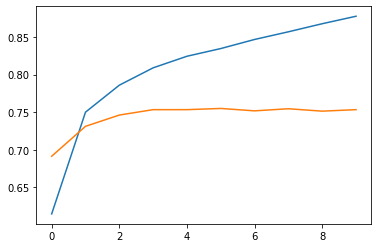

In [42]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [71]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{}

In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [70]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/My Drive/.kaggle/. Or use the environment method.


In [48]:
!unzip imdb-dataset-of-50k-movie-reviews.zip
!ls

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        
'IMDB Dataset.csv'			 kaggle.json
 imdb-dataset-of-50k-movie-reviews.zip	 sample_data


In [75]:
import os  
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"   
from google.colab import drive  
drive.mount('/content/gdrive')  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
cd//content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [76]:
!ls

kaggle.json


In [77]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 19% 5.00M/25.7M [00:00<00:00, 49.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 139MB/s] 


In [78]:
!kaggle datasets download -d percevalw/englishfrench-translations  
!unzip imdb-dataset-of-50k-movie-reviews.zip 
!ls  

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 131MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        
 englishfrench-translations.zip   imdb-dataset-of-50k-movie-reviews.zip
'IMDB Dataset.csv'		  kaggle.json


In [79]:
pd_data = pd.read_csv('/content/gdrive/MyDrive/kaggle/IMDB Dataset.csv', header=0)

In [80]:
pd_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(pd_data['review'])
sequences = tokenizer.texts_to_sequences(pd_data['review'])

word_idx = tokenizer.word_index

print('%s개의 고유한 토큰을 찾았습니다.' % len(word_idx))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(pd_data['sentiment'])
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

X_train = data[:training_samples]
y_train = labels[:training_samples]
X_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

124252개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (50000, 100)
레이블 텐서의 크기: (50000,)


In [83]:
!kaggle datasets download -d anindya2906/glove6b

 99% 837M/844M [00:07<00:00, 114MB/s]
100% 844M/844M [00:07<00:00, 125MB/s]


In [84]:
!unzip glove6b.zip

Archive:  glove6b.zip
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
  inflating: glove.6B.50d.txt        


In [94]:
import os

embedding_idx = {}
f = open(os.path.join('/content/gdrive/MyDrive/kaggle/', 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coef = np.asarray(values[1:], dtype='float32')
  embedding_idx[word] = coef
f.close()

print(len(embedding_idx))

400000


In [95]:
embedding_dim = 100

model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                320032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [96]:
embeddimg_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_idx.items():
  if i < max_words:
    embedding_vec = embedding_idx.get(word)
    if embedding_vec is not None:
      embeddimg_matrix[i] = embedding_vec

In [97]:
model.layers[0].set_weights([embeddimg_matrix])
model.layers[0].trainable = False

In [105]:
y_train = pd.Series(y_train).astype('category').cat.codes
y_val = pd.Series(y_val).astype('category').cat.codes

In [106]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 147ms/step - loss: 1.8221 - acc: 0.5150 - val_loss: 0.8162 - val_acc: 0.5043
Epoch 2/10
7/7 [==============================] - 1s 119ms/step - loss: 0.5025 - acc: 0.7400 - val_loss: 1.0623 - val_acc: 0.5017
Epoch 3/10
7/7 [==============================] - 1s 225ms/step - loss: 0.4728 - acc: 0.6950 - val_loss: 0.6917 - val_acc: 0.5623
Epoch 4/10
7/7 [==============================] - 1s 227ms/step - loss: 0.2911 - acc: 0.9050 - val_loss: 2.4710 - val_acc: 0.4986
Epoch 5/10
7/7 [==============================] - 1s 233ms/step - loss: 0.3477 - acc: 0.9200 - val_loss: 1.1807 - val_acc: 0.5032
Epoch 6/10
7/7 [==============================] - 1s 130ms/step - loss: 0.1537 - acc: 0.9750 - val_loss: 1.2264 - val_acc: 0.5009
Epoch 7/10
7/7 [==============================] - 1s 128ms/step - loss: 0.1593 - acc: 0.9700 - val_loss: 0.7255 - val_acc: 0.5654
Epoch 8/10
7/7 [==============================] - 1s 233ms/step - loss: 0.0501 - acc: 1.00